> In matlab.graphics.chart.internal.getRealData (line 52)
In stem (line 40)



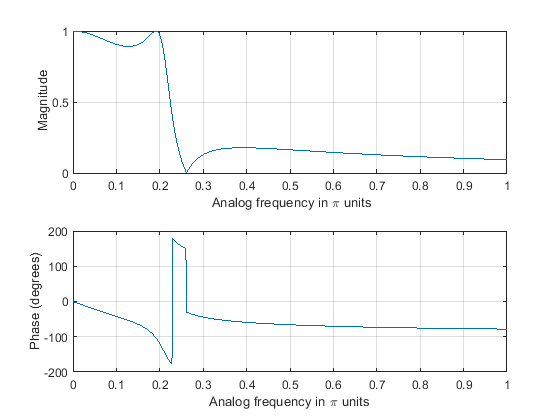

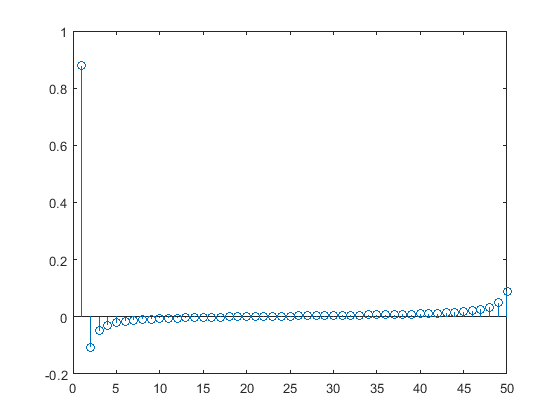

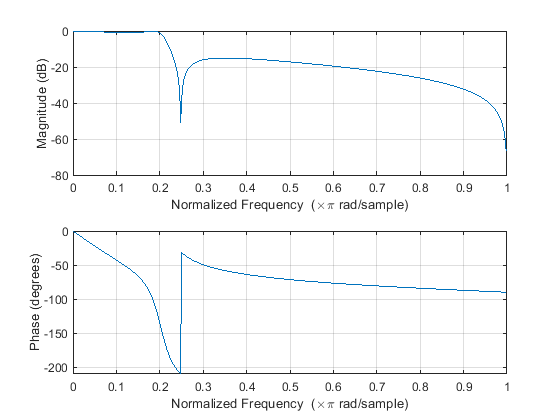

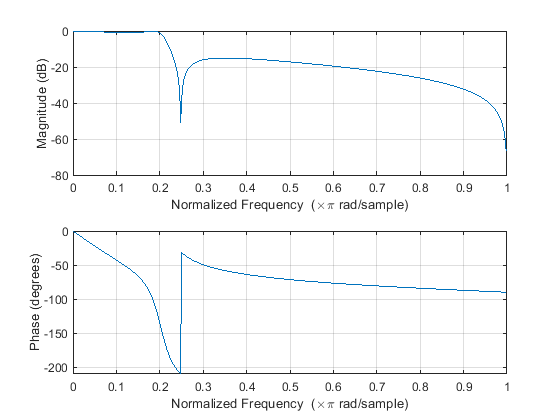

In [1]:
%% FILTER PARAMETERS
T=1;
wp=0.2*pi;
ws=0.3*pi;
Rp=1; %dB
As=15; %dB
e=sqrt(10^(Rp/10)-1);
A=10^(As/20);
omegap=(2/T)*tan(wp/2);
omegas=(2/T)*tan(ws/2);
omegac=omegap;
wmax=pi;
%% N-th
k0=omegap/omegas;
k1=e/sqrt(A^2-1);
k2=ellipke(k0);
k3=ellipke(sqrt(1-k1^2));
k4=ellipke(k1);
k5=ellipke(sqrt(1-k0^2));
N=ceil((k2*k3)/(k4*k5));
%% FILTER
[z,p,k]=ellipap(N,Rp,As);
a = real(poly(p));
aNn = a(N+1);
p2 = p*omegac;
a2 = real(poly(p2)); 
aNu = a2(N+1);
b = real(poly(z)); 
M = length(b);
bNn = b(M);
z2 = z*omegac; 
b2 = real(poly(z2));
bNu = b2(M);
k = k*(aNu*bNn)/(aNn*bNu);
bt = k*b2;
at=a2;
[ha,x,t] = impulse(bt,at);
w = [0:1:500]*wmax/500;
h = freqs(bt,at,w);
mag = abs(h);
phase = angle(h);
phasedeg = phase*180/pi;
subplot(2,1,1), plot(w/pi,mag), grid on
xlabel(' Analog frequency in \pi units');
ylabel(' Magnitude');
subplot(2,1,2), plot(w/pi,phasedeg), grid on
xlabel ('Analog frequency in \pi units');
ylabel( 'Phase (degrees)');
%% Digital IIR LPF
[b1,a1] = bilinear(bt,at,1/T);
figure
freqz(b1,a1)
%% desaign Digital IIR LPF filter by matlab 
[b2,a2]=ellip(N,Rp,As,wp/pi);
figure
freqz(b2,a2)
hh=ifft(h,50);
figure
stem(hh)